In [1]:
import sys
print(sys.executable)

/Users/monika/D7-project/ds-bcc-tania-fernandes-d7/fa24-team-b/.venv/bin/python


In [2]:
!pip3 install geopy

  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip3 install geopandas

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0-cp313-cp313-macosx_12_0_arm64.whl.metadata (5.5 kB)
  Using cached pyproj-3.7.0-cp313-cp313-macosx_14_0_arm64.whl.metadata (31 kB)
  Using cached shapely-2.0.6-cp313-cp313-macosx_11_0_arm64.whl.metadata (7.0 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached pyogrio-0.10.0-cp313-cp313-macosx_12_0_arm64.whl (15.1 MB)
Using cached pyproj-3.7.0-cp313-cp313-macosx_14_0_arm64.whl (4.6 MB)
Using cached shapely-2.0.6-cp313-cp313-macosx_11_0_arm64.whl (1.3 MB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip3 install shapely


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip3 install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [6]:
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import matplotlib as plt


In [7]:
geolocator = Nominatim(user_agent="D7-project")
location = geolocator.geocode("715 Tremont Street, Boston, MA")
print((location.latitude, location.longitude))

(42.34091, -71.07786739982502)


In [9]:
# Load the shapefile
shapefile = gpd.read_file("../data/Boston_Precinct_Boundaries")
# Check the CRS
print(shapefile.crs)

EPSG:3857


In [10]:
# Example coordinates from geocoding
address_point = Point(location.longitude, location.latitude)

# Create a GeoDataFrame for the address point
address_gdf = gpd.GeoDataFrame([{'geometry': address_point}], crs="EPSG:3857")  # Assuming your shapefile uses WGS 84 (EPSG:4326)
# address_gdf['geometry'] = address_gdf.buffer(0.0001) 

In [11]:
print(address_gdf)
print(shapefile.crs)
print(address_point)

                 geometry
0  POINT (-71.078 42.341)
EPSG:3857
POINT (-71.07786739982502 42.34091)


In [12]:
print(address_gdf.is_valid.unique())
print(shapefile.is_valid.unique())

[ True]
[ True]


In [13]:
print(address_gdf.geom_type.unique())
print(shapefile.geom_type.unique())

['Point']
['Polygon']


In [14]:
print(address_gdf.is_empty.unique())
print(shapefile.is_empty.unique())

[False]
[False]


In [15]:
address_point = Point(location.longitude, location.latitude)
address_gdf = gpd.GeoDataFrame(geometry=[address_point], crs="EPSG:4326")
address_gdf = address_gdf.to_crs(shapefile.crs)


<Axes: >

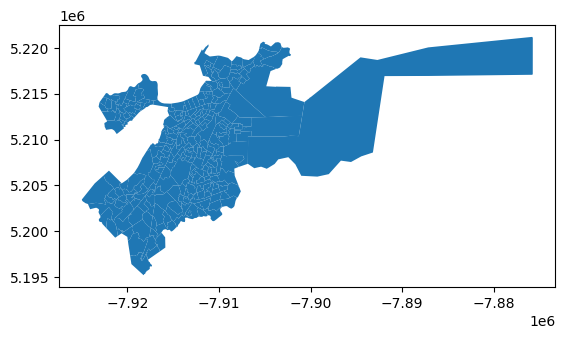

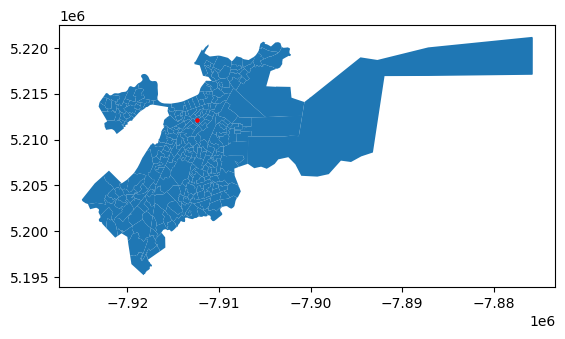

In [16]:
shapefile.plot()
address_gdf.plot(ax=shapefile.plot(), color='red', markersize=5)


In [17]:
# Perform the spatial join
result = gpd.sjoin(address_gdf, shapefile, how="left", predicate="intersects")
print(result)

                           geometry  index_right DISTRICT WDPCT Ward1  \
0  POINT (-7912352.006 5212183.695)           43    04-04  0404    04   

  Precinct1 State_WDPC Gov_Coun_2 Rep_2022 Senate_202  Congress_2  Shape_Leng  \
0        04      04-04        4th      9th        1st         7.0  1985.35373   

      Shape_Area  
0  213150.911734  
